### Salish Sea Conditions of the oil spill site during the scenario run
Tide data is taken from [DFO-Pacific website](https://www.pac.dfo-mpo.gc.ca/science/charts-cartes/obs-app/observed-eng.aspx?StationID=07735) at the nearest tide gauge.

Fraser River discharge  and wind speed are taken from data used for Salish Sea Cast

In [1]:
import arrow
import os
from datetime import datetime, timedelta
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
from IPython.display import Image

from salishsea_tools import data_tools, places, nc_tools, wind_tools

In [ ]:
#tides = Path('/results2/SalishSea/nowcast-green.201905/') #file format 07jul19/SalishSea_1d_20190707_20190707_grid_T.nc var(sossheig)
#wind_speed = ('/results/forcing/atmospheric/GEM2.5/operational/') #file format ops_y2019m07d07.nc vars(u_wind, v_wind)

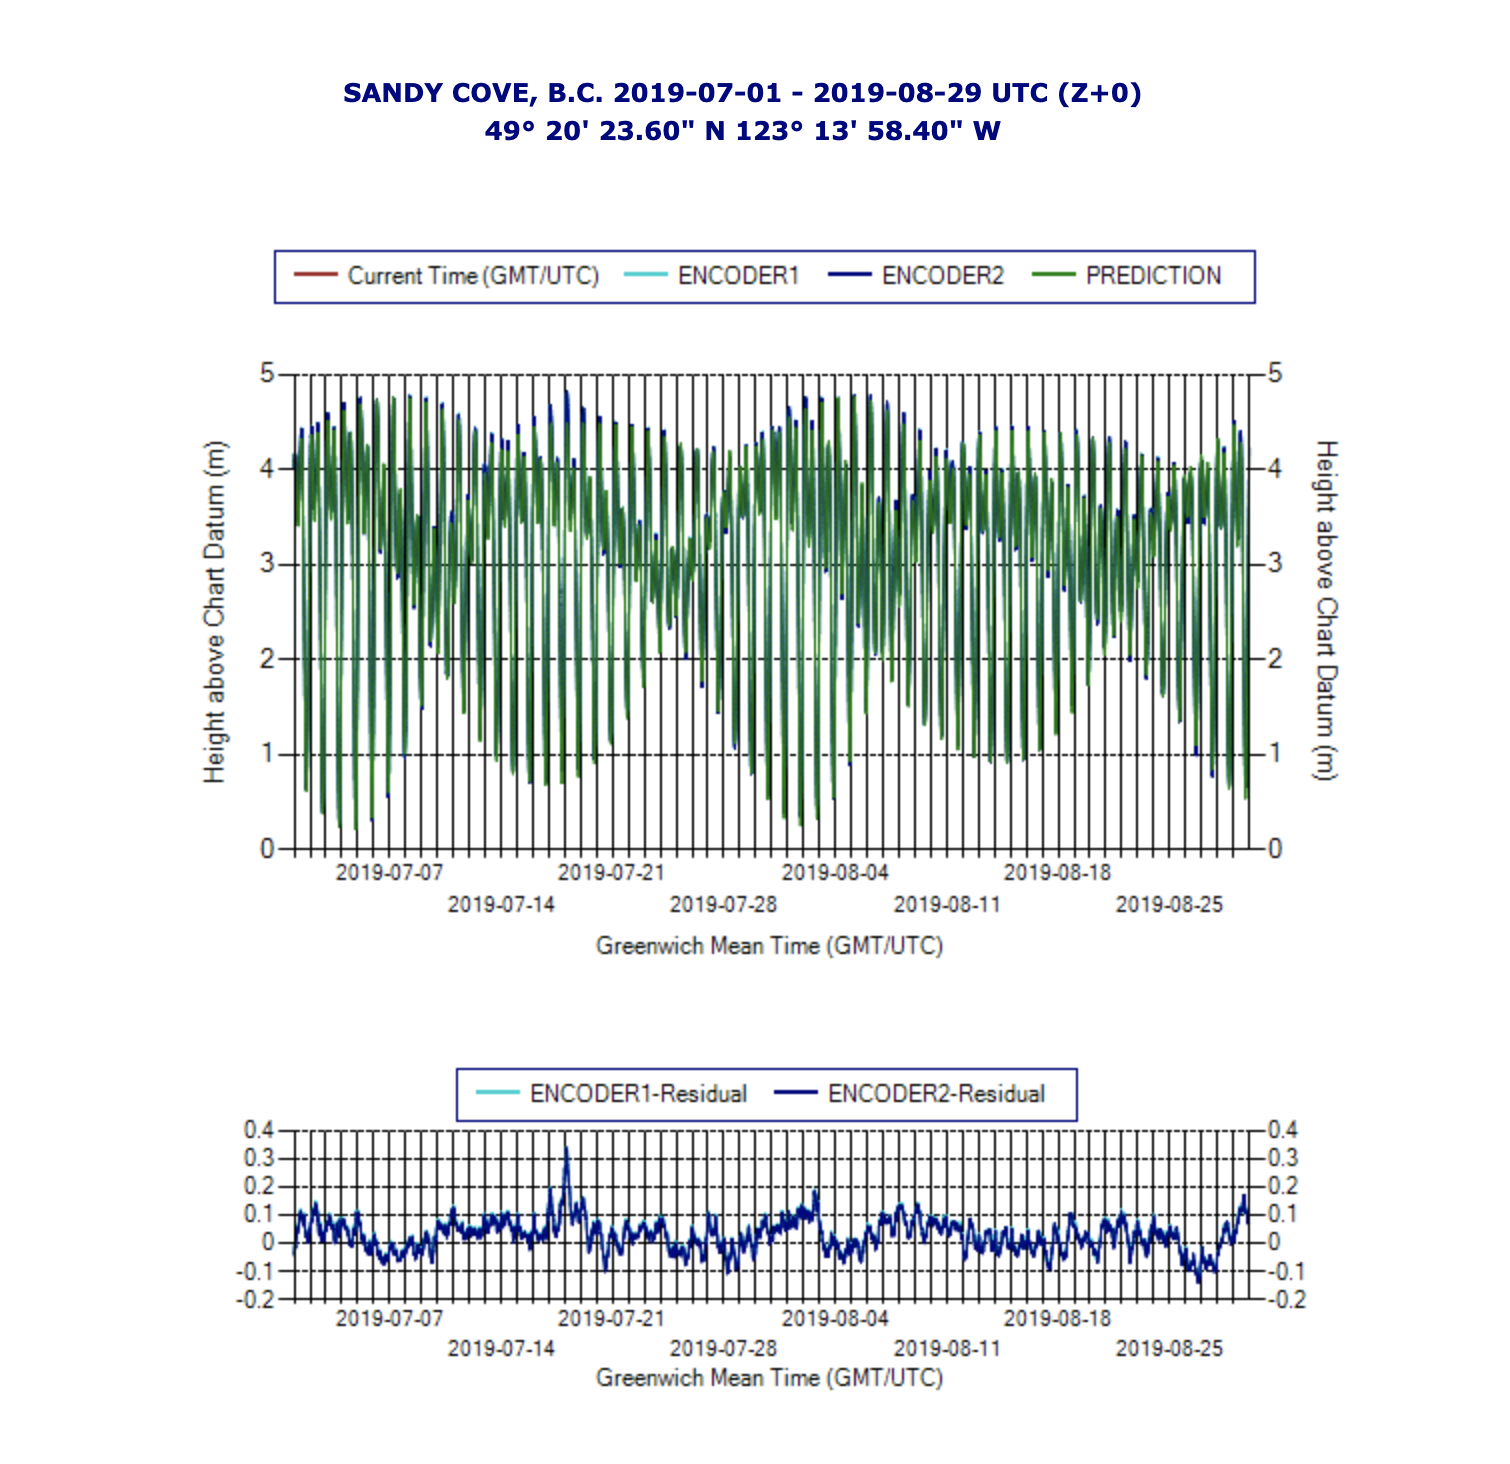

In [3]:
# Tides
graph_start = '2019-07-01'
tide_path = '/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Tides/'
tide_location = 'SandyCove_'
tide_filename = tide_path + 'Tides_' + tide_location + graph_start +'.png'
Image(filename=tide_filename)

In [20]:
# Wind velocity
wind_path = '/results/forcing/atmospheric/GEM2.5/operational/' #file format ops_y2019m07d07.nc vars(u_wind, v_wind)
wind_filename = 'ops_y2019m07d07.nc' 
wind_velocity = xr.open_dataset(wind_path + wind_filename)
place = 'Sand Heads'
lon_lat = places.PLACES[place]['GEM2.5 grid ji']
[lon,lat] = lon_lat
[lon,lat]

[135, 151]

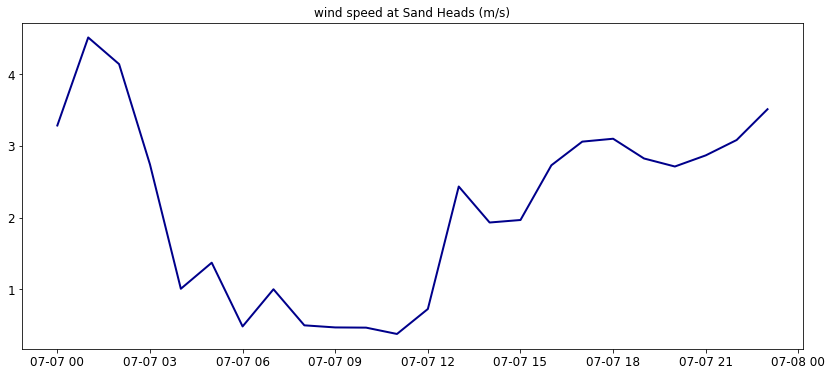

In [21]:
u_velocity = wind_velocity.u_wind.isel(x=lon, y=lat).data
v_velocity = wind_velocity.v_wind.isel(x=lon, y=lat).data
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_velocity, v_velocity)

# Plots
line_color = 'darkblue'
line_width = 2
font_size = 12
fig, ax = plt.subplots(figsize = (14,6))

ax.plot(wind_velocity.time_counter,wind_speed, color = line_color, linewidth = line_width)
#ax.bar(wind_velocity.time_counter,wind_speed, width=20, color = 'b')
ax.set_title('wind speed at '+place+' (m/s)', fontsize = font_size)
#ax.set_xticks([])
#ax.set_yticks([])
ax.tick_params(labelsize=font_size)

In [24]:
wind_speed

array([3.2848926 , 4.5119925 , 4.140265  , 2.7421064 , 1.0085678 ,
       1.3720652 , 0.4836546 , 1.0016851 , 0.49885282, 0.46966025,
       0.46674135, 0.37840384, 0.7267991 , 2.4341357 , 1.9323213 ,
       1.9672865 , 2.7301264 , 3.0598097 , 3.1001594 , 2.8249443 ,
       2.7130623 , 2.8683114 , 3.0822735 , 3.511804  ], dtype=float32)

In [25]:
# alternate using wind from ERDDAP
alt_wind_path = '/ocean/rlovindeer/Atlantis/Physics/Wind/'
alt_wind_filename = '2019-07-06_Wind_variables.nc' 
alt_wind_velocity = xr.open_dataset(alt_wind_path + alt_wind_filename)


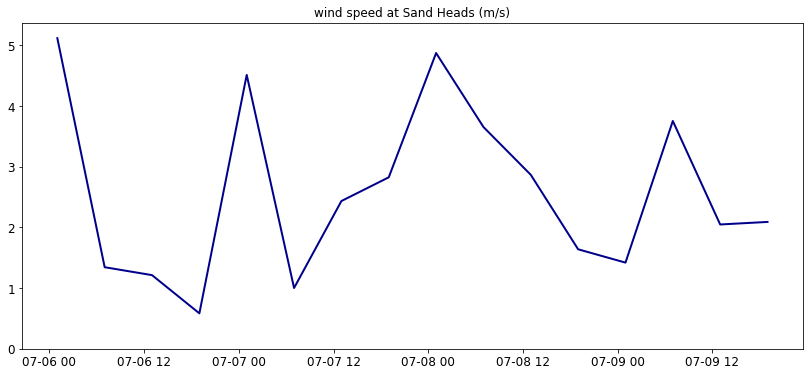

In [26]:
alt_u_velocity = alt_wind_velocity.u_wind.isel(gridX=lon, gridY=lat).data
alt_v_velocity = alt_wind_velocity.v_wind.isel(gridX=lon, gridY=lat).data
alt_wind_speed, alt_wind_dir = wind_tools.wind_speed_dir(alt_u_velocity, alt_v_velocity)


fig, ax = plt.subplots(1,1, figsize = (14,6))
ax.bar(alt_wind_velocity.time,alt_wind_speed, width=20, color='b')
#ax.plot(alt_wind_velocity.time,alt_u_velocity, color = line_color, linewidth = line_width)
ax.plot(alt_wind_velocity.time,alt_wind_speed, color = line_color, linewidth = line_width)
ax.set_title('wind speed at '+place+' (m/s)', fontsize = font_size)
#ax.set_xticks([])
#ax.set_yticks([])
ax.tick_params(labelsize=font_size)

In [27]:
alt_wind_speed

array([5.1171355, 1.3440597, 1.2135153, 0.5840172, 4.5119925, 1.0016851,
       2.4341357, 2.8249443, 4.8721805, 3.6536827, 2.8661091, 1.6391394,
       1.4198462, 3.752737 , 2.0480134, 2.090001 ], dtype=float32)

In [12]:
# Fraser River Discharge 
# format is YYYY MM DD m^3

fraser_path = '/data/dlatorne/SOG-projects/SOG-forcing/ECget/Fraser_flow'
df = pd.read_csv(fraser_path, skiprows=35000, names=['date_flow']) 
df = pd.DataFrame(df.date_flow.str.split(' ',3).tolist(),columns = ['Y','M','D','flow_m^3'])
df1 = df.loc[df['Y'] == '2021']
df2 = df1.loc[df['M'] == '08']
df3 = df2.loc[df['D']== '02']
df3
#print(df.loc[df['Y'] == '2019'],df.loc[df['M'] == '07'],df.loc[df['D'] == '07'])

,Y,M,D,flow_m^3
4968,2021,08,02,2.846528e+03
